Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


317/317 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9847 - loss: 0.0690 - val_accuracy: 1.0000 - val_loss: 6.1351e-04
Epoch 2/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9989 - loss: 0.0030 - val_accuracy: 0.9996 - val_loss: 0.0013
Epoch 3/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9997 - loss: 9.8303e-04 - val_accuracy: 1.0000 - val_loss: 2.1736e-04
Epoch 4/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 1.0000 - loss: 5.4662e-04 - val_accuracy: 1.0000 - val_loss: 1.2029e-04
Epoch 5/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9996 - val_loss: 4.7711e-04
67/67 - 1s - 12ms/step - accuracy: 0.9991 - loss: 0.0020

Test accuracy: 0.9990543723106384
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 364,037 (1.39 MB)

 Trainable params: 121,345 (474.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,692 (948.02 KB)

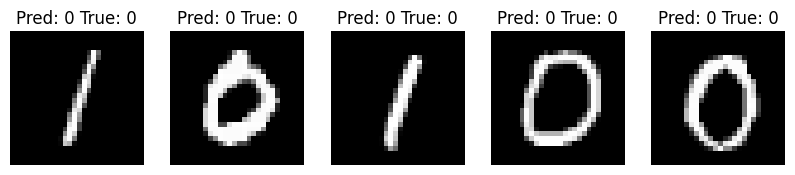

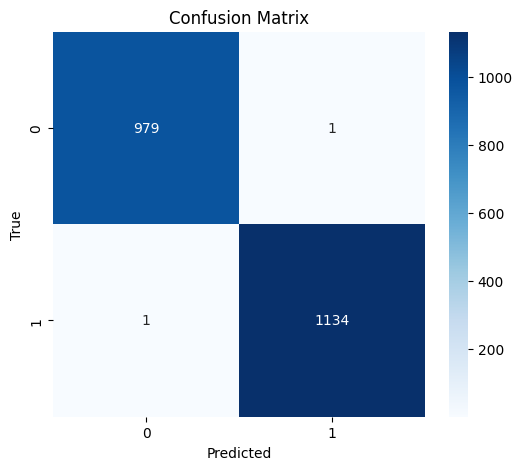

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135

    accuracy                           1.00      2115
   macro avg       1.00      1.00      1.00      2115
weighted avg       1.00      1.00      1.00      2115



In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[(y_train == 0) | (y_train == 1)]
y_train = y_train[(y_train == 0) | (y_train == 1)]
x_test = x_test[(y_test == 0) | (y_test == 1)]
y_test = y_test[(y_test == 0) | (y_test == 1)]

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

y_pred = model.predict(x_test)

model.summary()
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(y_pred[i])} True: {np.argmax(y_test[i])}")
    plt.axis('off')
plt.show()

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test

y_pred_labels = (y_pred > 0.5).astype(int)
conf_matrix = confusion_matrix(y_true, y_pred_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_true, y_pred_labels))
